In [1]:
import pandas as pd
import numpy as np

##### 数据查看

In [2]:
# 附件一至附件四
data1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
data2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
# data2.sort_values('销售日期')
data3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
# data3.sort_values('日期')
data4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")

In [18]:
# 附件二切分demo，便于编程，最终应删去
data2_replace = data2.sample(100000)

# 合并表一与表二
datas_replace = pd.merge(data2_replace, data1, how='left', on='单品编码')
datas = pd.merge(data2, data1, how='left', on='单品编码')

# datas=[data1,data2,data3,data4]

##### 清洗数据

In [4]:
# for i in datas:
#     for j in i.columns:
#         print(i[j].value_counts())

### 问题一

In [15]:
# 获得每日销售总量
Totaldailysales = pd.DataFrame(
    columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
Totaldailysales.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
for i in datas['销售日期'].value_counts().keys():
    daydata = datas[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
            ['单品名称', '分类编码', '分类名称']].tolist()
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
            ['分类编码', '分类名称']].tolist()
# 获得每日销售总量
Totaldailysales_replace = pd.DataFrame(
    columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
Totaldailysales_replace.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
for i in datas_replace['销售日期'].value_counts().keys():
    daydata = datas_replace[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales_replace.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
            ['单品名称', '分类编码', '分类名称']].tolist()
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales_replace.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
            ['分类编码', '分类名称']].tolist()


C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\343782

###### 可视化，这里的是分类（6类）绘图，将第7行改为y1即为对每一个单品绘图（太多了点）

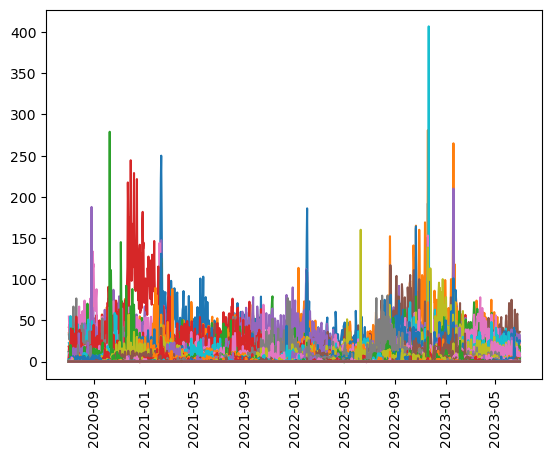

In [41]:
import matplotlib.pyplot as plt

x = datas['销售日期'].value_counts().keys().sort_values()
y1 = datas['单品编码'].value_counts().keys()
y2 = datas['分类编码'].value_counts().keys()

for i in y1:
    # for i in y2:
    y = []
    for j in x:
        try:
            y.append(Totaldailysales.loc[(j, i)]['销量(千克)'])
        except:
            y.append(0)
    plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

###### y1出现尖峰，检查发现为2022-11-21日，2022-11-21,102900005118831,407.0,娃娃菜,1011010101,花叶类，买了407kg娃娃菜。是否需要剔除？

###### y2出现尖峰，检查发现为2022-11-19日，不知道为什么这一天的流水多了很多，其他时候是1000单上下，这一天到了3000单，但是没有发现哪一单有问题的，应该单纯成交量大

,,销量(千克),单品名称,分类编码,分类名称
销售日期,单品编码/分类编码,,,,
2020-07-01,1011010101,205.402,None,1011010101,花叶类
2020-07-04,1011010101,236.587,None,1011010101,花叶类
2020-07-05,1011010101,223.899,None,1011010101,花叶类
2020-07-11,1011010101,270.343,None,1011010101,花叶类
2020-07-12,1011010101,300.189,None,1011010101,花叶类
...,...,...,...,...,...
2023-06-04,1011010101,215.285,None,1011010101,花叶类
2023-06-10,1011010101,240.235,None,1011010101,花叶类
2023-06-11,1011010101,213.908,None,1011010101,花叶类
